In [1]:
##############################
##          IMPORTS         ##
##############################
# THIRD PARTY IMPORTS
# For arrays
import numpy as np
# For creating plots
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Import Bayesian ridge regression implementation
from sklearn.linear_model import BayesianRidge
# For reading csv files
import pandas as pd

##############################
##       DIRECTORIES        ##
##############################
# Directories to find data files and save images
data_dir = 'raw_data/'
images_dir = 'img/'

## Figure 1

In [2]:
##############################
##    GENERATE FILENAMES    ##
##############################
def generate_filenames (prefix):
    """
    generates the list of filenames for the data and the list of particles numbers for the electron 
    gas 
    """
    filenames = np.array([prefix+"N_2.csv",prefix+"N_14.csv",prefix+"N_38.csv",prefix+"N_54.csv",prefix+"N_66.csv",
                      prefix+"N_114.csv",prefix+"N_162.csv",prefix+"N_186.csv",prefix+"N_246.csv",prefix+"N_294.csv",
                      prefix+"N_342.csv",prefix+"N_358.csv",prefix+"N_406.csv",prefix+"N_502.csv"])
    numbers = [2, 14, 38, 54, 66, 114, 162, 186, 246, 294, 342, 358,406,502]
    return filenames, numbers
    
##############################
## IMPORT AND SPLIT COLUMNS ##
##############################
def import_and_split_columns (data_path,sep=','):
    """
    imports the data at a given file name and splits the columns into states 
    (the number of shells), CC correlation energy, MBPT correlation energy, CC calculation 
    time, and MBPT calculation time.  Allows data to be separated with any character.
    """
    # Load the data
    data = pd.read_csv(data_path,sep=sep)
    
    # Separate the sequential data into arrays
    # First column is the energy level number
    states = np.asarray(data["states"])
    # Second column is the MBPT correlation energy
    mbpt = np.asarray(data["mbpt"])
    # Third column is the CC correlation energy
    cc = np.asarray(data["cc"])
    # Fourth column is the time needed to generate the CC correlation energy
    cc_times = np.asarray(data["cc_times"])
    # Fifth column is the time needed to generate the MBPT correlation energy
    mbpt_times = np.asarray(data["mbpt_times"])
    
    return states, mbpt, cc, mbpt_times, cc_times

##############################
##      GET STATES DICT     ##
##############################    
def get_states_dict ():
    """
    Inputs:
        None.
    Returns:
        states_dict (a dictionary): the conversion between shell number and number of 
            single particle states.
    Dictionary thats converts between number of shells to number of single particle states
    for the first 178 shells.  
    """
    states_dict = {
        1:2, 2:14, 3:38, 4:54, 5:66, 6:114, 7:162, 8:186, 9:246, 10:294, 
        11:342, 12:358, 13:406, 14:502, 15:514, 16:610, 17:682, 18:730, 
        19:778, 20:874, 21:922, 22:970, 23:1030, 24:1174, 25:1238, 26:1382, 
        27:1478, 28:1502,29:1598, 30:1694, 31:1790, 32:1850, 33:1898, 
        34:2042, 35:2090, 36:2282, 37:2378, 38:2426, 39:2474, 40:2618, 
        41:2714, 42:2730, 43:2838, 44:3006, 45:3102, 46:3150, 47:3294, 
        48:3486, 49:3582, 50:3678, 51:3726, 52:3870, 53:4014, 54:4206, 
        55:4218, 56:4410, 57:4602, 58:4650, 59:4746,  60:4938, 61:5034, 
        62:5106, 63:5202, 64:5442, 65:5554, 66:5602, 67:5794, 68:5890,
        69:5938, 70:6142, 71:6238, 72:6382, 73:6478, 74:6574, 75:6814,
        76:6862, 77:7150, 78:7390, 79:7486, 80:7582, 81:7774, 82:7822,
        83:7918, 84:8134, 85:8278, 86:8338, 87:8674, 88:8770, 89:8914,
        90:9106 ,91:9250, 92:9394, 93:9458, 94:9602, 95:9890, 96:10082,
        97:10274, 98:10370, 99:10514, 100:10754, 101:10898, 102:10994,
        103:11138, 104:11330, 105:11378, 106:11618, 107:11810, 108:11834,
        109:12074, 110:12122, 111:12266, 112:12362, 113:12458, 114:12698,
        115:12794, 116:12938, 117:13034, 118:13130, 119:13226, 120:13322,
        121:13418, 122:13466, 123:13610, 124:13802, 125:13818, 126:14058,
        127:14202, 128:14298, 129:14490, 130:14586, 131:14682, 132:14778,
        133:14970, 134:15042, 135:15090, 136:15186, 137:15378, 138:15522,
        139:15618, 140:15714, 141:15762, 142:15810, 143:15906, 144:16002,
        145:16050, 146:16098, 147:16146, 148:16242, 149:16386, 150:16482,
        151:16674, 152:16722, 153:16818, 154:16914, 155:16930, 156:17026,
        157:17122, 158:17218, 159:17338, 160:17386, 161:17434, 162:17530,
        163:17626, 164:17674, 165:17770, 166:17818, 167:17914, 168:17962,
        169:18010, 170:18058, 171:18154, 172:18202, 173:18218, 174:18314,
        175:18362, 176:18410, 177:18458, 178:18506}
        
    return states_dict

###################################### 
## LEGEND WITHOUTH DUPLICATE LABELS ##
######################################  
def legend_without_duplicate_labels(figure):
    """
        Inputs:
            figure(an instance of a Matplotlib graph)
        Returns:
            None.
        Adds a legend to a Matplotlib graph without any duplicate labels in the
        legend.
    """
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize=14)

### 1a: The convergence of $\Delta E_{CCD}$

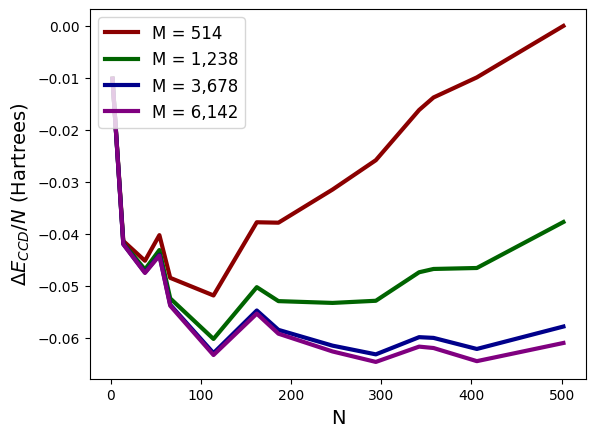

In [3]:
state_dict = get_states_dict()
# The folders where the data is contained
folders = ["rs_0_5/"]
# Save the number of neutrons after each run
numbers = []
cc_514 = []
cc_1238 = []
cc_3678 = []
cc_6142 = []
for folder in folders:
    sep = " "
    filenames, numbers = generate_filenames (data_dir + folder)
    for k in range(len(filenames)):
        states, mbpt, cc, mbpt_times, cc_times = import_and_split_columns (filenames[k],sep=sep)
        states = np.array([state_dict[i] for i in states])
        cc_514.append(cc[np.where(states==514)[0][0]]/numbers[k])
        cc_1238.append(cc[np.where(states==1238)[0][0]]/numbers[k])
        cc_3678.append(cc[np.where(states==3678)[0][0]]/numbers[k])
        cc_6142.append(cc[np.where(states==6142)[0][0]]/numbers[k])
plt.plot(numbers, cc_514, color="darkred", linewidth=3,label="M = 514")
plt.plot(numbers, cc_1238, color="darkgreen", linewidth=3,label="M = 1,238")
plt.plot(numbers, cc_3678, color="darkblue", linewidth=3,label="M = 3,678")
plt.plot(numbers, cc_6142, color="purple", linewidth=3,label="M = 6,142")
plt.legend(fontsize=12, loc="upper left")
plt.xlabel("N", fontsize=14)
plt.ylabel("$\Delta E_{CCD}/N$ (Hartrees)",fontsize=14)
plt.savefig(images_dir+"Figure1a.pdf", dpi=1000)

### 1b: Run time needed as a function of single particle states at different numbers of electrons

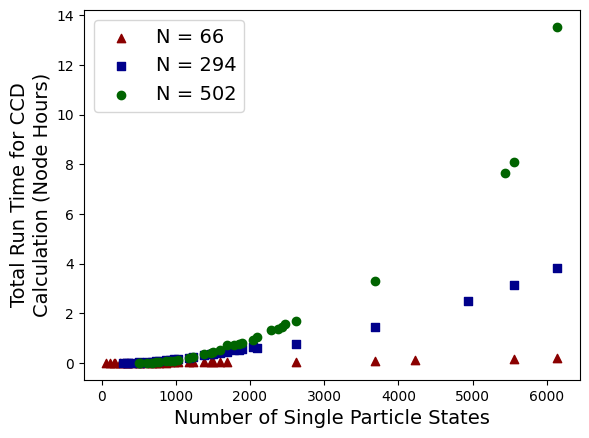

In [4]:
states = []
times = []
marker = ['^', 's', 'o']
color = ['darkred', 'darkblue', 'darkgreen']
label = ['N = 66', 'N = 294', 'N = 502']
i = 0
for folder in ["rs_0_5/"]:
    sep = " "
    filenames, numbers = generate_filenames (data_dir + folder)
    # For only three numbers of electrons
    for k in [4,9,-1]:
        states, mbpt, cc, mbpt_times, cc_times = import_and_split_columns (filenames[k],sep=' ')
        states = [state_dict[j] for j in states]
        plt.scatter(states, cc_times*4/60/60, marker=marker[i], color=color[i], label=label[i])
        i += 1
legend_without_duplicate_labels(plt)
plt.xlabel("Number of Single Particle States", fontsize=14)
plt.ylabel("Total Run Time for CCD\nCalculation (Node Hours)", fontsize=14)
plt.savefig(images_dir+"Figure1b.pdf", dpi=1000, bbox_inches="tight")

### 1c: RAM needed for calculations versus the number of single particle states in the calculations

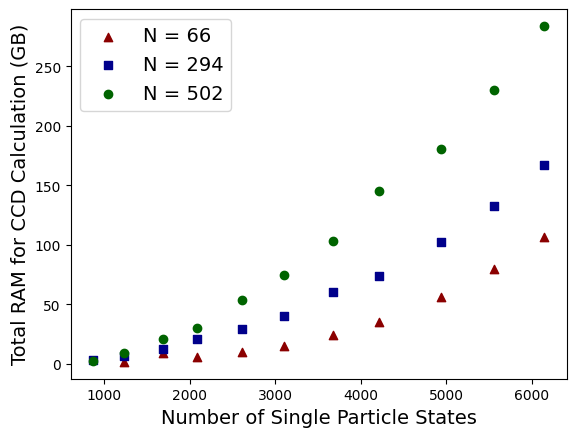

In [5]:
# Data for the RAM needed for each calculation, as collected on MSU's ICER computers
# Each point is [full energy levels, total energy levels, RAM (GB)]
# For r_s = 0.5
ram_data = np.array([[5,25,1.58],[5,30,9.46],[5,35,5.33],[5,40,9.50],[5,45,15.09],
    [5,50,24.19],[5,55,35],[5,60,56.25],[5,65,79.22],[5,70,106.49],[10,20,3.04],
    [10,25,6.77],[10,30,12.81],[10,35,20.56],[10,40,29.42],[10,45,40.40],
    [10,50,60],[10,55,73.86],[10,60,102.49],[10,65,132.53],[10, 70, 166.72],
    [14,20,2.72],[14,25,8.99],[14,30,20.56],[14,35,30],[14,40,53.25],[14,45,74.33],
    [14,50,103.52],[14,55,144.88],[14,60,180.06],[14,65,230],[14,70,283.79]])

# Color-coordinate the data before plotting
for point in ram_data:
    if point[0] == 5:
        marker = '^'
        color = 'darkred'
        label = "N = 66"
    elif point[0] == 10:
        marker = 's'
        color='darkblue'
        label = 'N = 294'
    else:
        marker = 'o'
        color='darkgreen'
        label = "N = 502"
    state = state_dict[point[1]]
    plt.scatter(state, point[-1], marker=marker, color=color, label=label)
legend_without_duplicate_labels(plt)
plt.xlabel("Number of Single Particle States", fontsize=14)
plt.ylabel("Total RAM for CCD Calculation (GB)", fontsize=14)
plt.savefig(images_dir+"Figure1c.pdf", dpi=1000, bbox_inches='tight')

### 1d: A plot of the convergence of $\Delta E_{CCD}$ and $\Delta E_{MBPT2}$

CPU times: user 487 ms, sys: 17.1 ms, total: 504 ms
Wall time: 171 ms


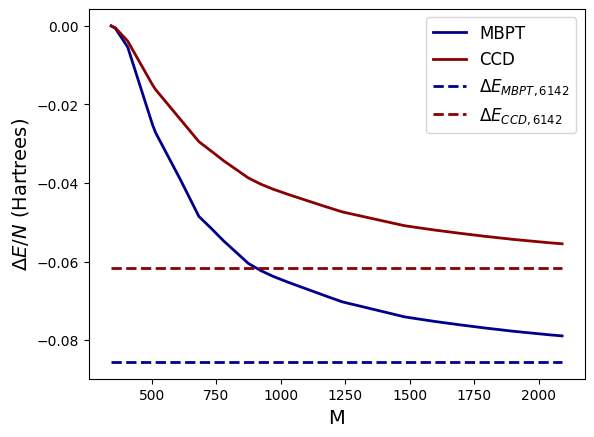

In [6]:
%%time
state_dict = get_states_dict()
# The folders where the data is contained
folders = ["rs_0_5/"]
# Save the number of neutrons after each run
numbers = []
# Extact the data just for N = 342
for folder in folders:
    sep = " "
    filenames, numbers = generate_filenames (data_dir + folder)
    for k in [10]:
        states, mbpt, cc, mbpt_times, cc_times = import_and_split_columns (filenames[k],sep=sep)
        states = np.array([state_dict[i] for i in states])
# Plot the convergence of the first 25 data points, where the data was collected sequentially
dim = 25        
plt.plot(states[:dim], mbpt[:dim]/numbers[10], linewidth=2, color="darkblue", label="MBPT")        
plt.plot(states[:dim], cc[:dim]/numbers[10], linewidth=2, color="darkred", label="CCD")
plt.hlines(mbpt[-1]/numbers[10], states[0], states[dim-1], linewidth=2, linestyle='--', color='darkblue', label="$\Delta E_{MBPT,6142}$")
plt.hlines(cc[-1]/numbers[10], states[0], states[dim-1], linewidth=2, linestyle='--', color='darkred', label="$\Delta E_{CCD,6142}$")
plt.legend(fontsize=12)
plt.xlabel("M", fontsize=14)
plt.ylabel("$\Delta E/N$ (Hartrees)", fontsize=14)
plt.savefig(images_dir+"Figure1d.pdf", dpi=1000, bbox_inches='tight')

### 1e: Plot of $\Delta E_{CCD}$ as a function of $\Delta E_{MBPT2}$

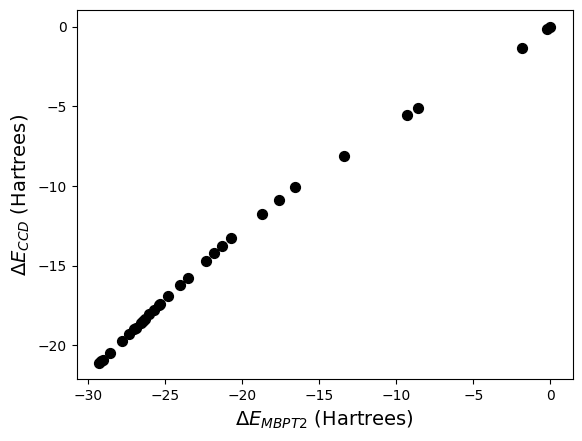

In [7]:
plt.scatter(mbpt, cc, color="black", s=50)
plt.xlabel("$\Delta E_{MBPT2}$ (Hartrees)", fontsize=14)
plt.ylabel("$\Delta E_{CCD}$ (Hartrees)", fontsize=14)
plt.savefig(images_dir+"Figure1e.pdf", dpi=1000, bbox_inches='tight')

### 1f: Plot of $\Delta E_{CCD}/\Delta E_{MBPT2}$ as a function of the number of electrons

CPU times: user 440 ms, sys: 12 ms, total: 452 ms
Wall time: 156 ms


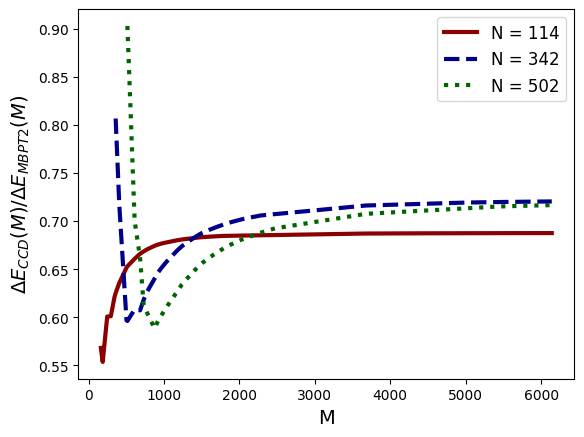

In [8]:
%%time
state_dict = get_states_dict()
# The folders where the data is contained
folders = ["rs_0_5/"]
# Save the number of electrons after each run
numbers = []
colors = ['darkred', 'darkblue', 'darkgreen']
linestyles = ['-', '--', ':']
indices = [5,10,-1]
labels = ["N = 114", "N = 342", "N = 502"]
# Gather and plot the ratios for three different numbers of electrons
for folder in folders:
    sep = " "
    filenames, numbers = generate_filenames (data_dir + folder)
    for k in range(3):
        states, mbpt, cc, mbpt_times, cc_times = import_and_split_columns (filenames[indices[k]],sep=sep)
        states = [state_dict[j] for j in states]
        # Remove the second to last point, which is out of order
        states = np.delete(states,-2)
        mbpt = np.delete(mbpt,-2)
        cc = np.delete(cc,-2)
        # Remove the first point, which is zero and will cause a division error
        states = np.delete(states,0)
        mbpt = np.delete(mbpt,0)
        cc = np.delete(cc,0)
        plt.plot(states, cc/mbpt, color=colors[k],label=labels[k], linewidth=3,linestyle=linestyles[k])
plt.legend(fontsize=12)
plt.xlabel("M", fontsize=14)
plt.ylabel("$\Delta E_{CCD}(M)/\Delta E_{MBPT2}(M)$", fontsize=14)
plt.savefig(images_dir+"Figure1f.pdf", dpi=1000, bbox_inches='tight')

## Figure 2 and Table 1

In [9]:
####################################
## RMSE (Root Mean Squared Error) ##
####################################  
def rmse(A,B):
    """
        Inputs:
            A,B (lists or NumPy arrays): the data.  A and B must be the same
                length.
        Returns:
            Unnamed (a float): the RMSE score between A and B
        Computes the RMSE score between two data sets.
    """
    assert len(A)==len(B)
    return np.sqrt(np.average((np.asarray(A)-np.asarray(B))**2))

##############################
##       PERCENT ERROR      ##
############################## 
def percent_error (prediction, truth):
    """
        Inputs:
            prediction (a float, list, or Numpy array): the predicted value(s)
            truth (a float, list, or NumPy array): the true value(s)
        Returns:
            Unnamed (a float): the percent error between the two inputs
        Computes the percent error between the given prediction and true values
    """
    prediction = np.asarray(prediction)
    truth = np.asarray(truth)
    return np.average(np.abs((prediction-truth)/truth))*100

##############################
##         GET SEQ          ##
##############################
def get_seq (data):
    """
    returns the first 25 entries in the array it is passed, corresponding to the data for 
    calculations up to 24 open shells, including the calculation at 0 open shells
    """
    return data[:25]
    
##############################
##          GET 70          ##
##############################
def get_70 (data):
    """
    returns the point in the passed array corresponding the the calculation at 70 shells
    or 6,142 single particle states
    """    
    return data[-1]

##############################
##  FORMAT SEQUENTIAL DATA  ##
##############################
def format_sequential_data (y, seq=2):
    """
        Inputs:
            y (a list or NumPy array): the y values of a data set
            seq (an int): the length of the sequence.  Default value is 2
        Returns:
            inputs (a list): the inputs for a machine learning model using 
                sequential data formatting
            outputs (a list): the outputs for a machine learning model using
                sequential data formatting              
        Formats a given list or array in sequential formatting using the 
        given sequence lenght.  Default sequence length is two.

        Explanation of sequential formatting:
        Typically data points of the form (x,y) are used to train a machine
        learning model.  This teaches the model the relationship between the
        x data and the y data in the training range.  This model works well 
        for interpolation, but not so well for extrapolation.  A better data
        model for extrapolation would be one that learns the patterns in the y
        data to better guess what y value should come next.  Therefore, this 
        method formats the data in a sequential pattern so that the points are
        of the form ((y1, y2, ..., yn), yn+1) where n is the lenght of the 
        sequence (seq).
    """
    # Make sure seq is an int
    assert isinstance(seq, int)
    # Set up the input and output lists
    inputs = []
    outputs = []
    # Cycle through the whole y list/array and separate the points into 
    # sequential format
    for i in range(0, len(y)-seq):
        inputs.append(y[i:i+seq])
        outputs.append(y[i+seq])
    # Return the input and output lists.  NOTE: the data type of the return 
    # values is LIST
    return inputs, outputs  

####################################
## SEQUENTIAL EXTRAPOLATE SKLEARN ##
####################################
def sequential_extrapolate_sklearn (R, y_train, num_points, seq):
    """
        Inputs:
            R (an object): A trained Scikit-Learn regression model
            y_train (a list): the y component of the training data set, unformatted
            num_points (an int): the number of points to be in the extrapolated data set
            seq (an int): the SRE length of sequence that R was trained with
        Returns:
            y_test (a list): the extrapolated data set
            y_std (a list): the uncertainity on each point in the extrapoalted set
        Performs SRE using a trained Scikit-Learn regression model.
    """
    # Make sure inputs are of the proper type
    assert isinstance(num_points, int)
    assert isinstance(seq, int)

    # Add the training data to the extrapolated data set and no uncertainities for the
    # training data
    y_test = y_train.copy()
    y_std = np.zeros(len(y_train)).tolist()

    # Extrapolate until enough data points have been predicted
    while len(y_test) < num_points:
        next_test = y_test[-seq:]
        point,std = R.predict([next_test],return_std=True)
        y_test.append(point[0])
        y_std.append(std[0])

    # Return the predicted data set and uncertainities
    return y_test,y_std

#############################################
## BAYESIAN RIDGE REGRESSION EXTRAPOLATION ##
############################################
def bayesian_ridge_regression_extrapolation (numbers, filenames, seq=3, start_dim=5,dim=15, isDisplay=False, sep=" "):
    """
    Inputs:
        numbers (a list of ints): the number of particles in each calculation to be performed
        filenames (a list of strings): the filenames for each data set to be analyzed
        seq (an int): the length of the sequence for the sequential regression extrapolation format.  Default 
            value is 3.
        start_dim (an int): the index to start the training data.  Default value is 5.
        dim (an int): one more than the index to end the training data.  Default value is 15.
        isDisplay (a boolean): True case prints information to the console about every analysis performed.  
            Default value is False.
        isOld (a boolean): True cases uses a method written for the old method of formatting data.  Default value 
            is False.
        sep (a string): the delimiter in the data files.  Default value is " ".
    Returns:
        data (a 2D list): the first column is the fully calculated converged CC correlation energy and the
            second column is the ML prediction.  There is a row for each analysis performed.
        std (a 1D list): the uncertainity on the prediction of the converged CC correlation energy for each 
            analyze that is performed.
        errs (a 1D list): the percent error for each analysis that is performed
    Uses SRE formatting for CC and MBPT correlation energies to extrapolation to the converged CC 
    correlation energy.  The machine learning algorithm is Bayesian ridge regression implemented by Scikit-Learn.
    """
    
    def warn(*args, **kwargs):
        pass
    import warnings
    warnings.warn = warn
   
    # Check to make sure certain requirements are met and force some arguments to ints to avoid
    # later errors
    assert len(numbers) == len(filenames)
    seq = int(seq)
    start_dim = int(start_dim)
    dim = int(dim)

    # Set the number of training points and the length of the 
    # sequence for the SRE algorithm
    data = []
    errs = []
    std = []
    
    # Loop through every number of particles given
    for i in range(len(numbers)):
        if isDisplay:
            print("***************************************************")
            print("Number of Electrons:",numbers[i])
            
        # Import and format the data 
        states, mbpt, cc, mbpt_times, cc_times = import_and_split_columns(filenames[i], sep=sep)
            
        # Seperate the final values (the test data), and the training data (taken from the first 
        # 25 values)
        final_cc = get_70(cc)
        final_mbpt = get_70(mbpt)
        cc_seq = get_seq(cc)
        mbpt_seq=get_seq(mbpt)

        # Separate the specified points for the training data
        training_data = cc_seq[start_dim:dim]/mbpt_seq[start_dim:dim]
        training_data = training_data.tolist()
        
        # Format the training data in sequential series formatting
        x_train, y_train = format_sequential_data (training_data, seq=seq)

        # Set up Gaussian Process algorithm and train it
        R = BayesianRidge(n_iter=10000,tol=1e-15)
        R.fit(x_train, y_train)

        # Feed the trained GP algorithm and data into the SRE method
        ypred,ystd = sequential_extrapolate_sklearn(R, training_data, 50, seq=seq)

        # Separate the last prediction as the final converged slope
        final_slope = ypred[-1]
        
        # Data analysis on the results
        if isDisplay:
            print("ERROR BETWEEN SRE AND TRUE CONVERGED VALUES:",np.abs((final_cc/final_mbpt)- final_slope))
            print("CONVERGENCE OF PREDICTION:", np.abs(ypred[-2]- final_slope))
            print()

        # Predict the CC correlation energy at the long range point
        cc_prediction = final_slope*final_mbpt
        # Get the uncertainity on the CC correlation energy prediction that is returned by the 
        # Bayesian ridge regression algoritm
        slope_uncertainity = ystd[-1]
        cc_prediction_uncertainity = slope_uncertainity*final_mbpt
        
        if isDisplay:
            print("PERCENT ERROR FOR EXTRAPOLATION:", percent_error(cc_prediction, final_cc))
            print("Predicted CCD Correlation Energy:", final_slope*final_mbpt)
            print("Actual CCD Correlation Energy:", final_cc)
        
        # Save the neccessary data
        data.append([final_cc, cc_prediction])
        errs.append(percent_error(cc_prediction, final_cc))
        std.append(cc_prediction_uncertainity)

        if isDisplay:
            print("********************************************************************")
    
    if isDisplay:        
        print("AVERAGE PERCENT ERROR:", np.avg(errs))
        print("MAXIMUM PERCENT ERROR:", np.max(errs))
        print("AVERAGE UNCERTAINITY:", np.avg(std))

    return data, std, errs

In [10]:
%%time
# The folders where the data is contained
folders = ["rs_0_05/", "rs_0_1/", "rs_0_25/", "rs_0_5/", "rs_0_75/"]
# Save the number of neutrons after each run
numbers = []
# Collecte the predicted and true converged CCD correlation energies along
# with the uncertianities
data_collected = []
std_collected = []
# Perform the Gaussian process extrapolation on every data set and save the results
for folder in folders:
    sep = " "
    filenames, numbers = generate_filenames (data_dir + folder)
    data, std, errs = bayesian_ridge_regression_extrapolation (numbers, filenames, seq=2,\
                            start_dim=5,dim=21, isDisplay=False, sep=sep)
    data_collected.append(data)
    std_collected.append(std)
# Split the predictions from the true data and divide by N
predictions_collected = []
true_collected = []
numbers = np.asarray(numbers)
for data in data_collected:
    data = np.asarray(data)
    predictions_collected.append(data[:,1]/numbers)
    true_collected.append(data[:,0]/numbers)
# Divide the uncertainity by N as well
std_collected = [i/numbers for i in std_collected]

CPU times: user 3.38 s, sys: 30.5 ms, total: 3.41 s
Wall time: 3.18 s


In [11]:
def graph_model_outputs_with_uncertainities_many (joint_x_data, true_data, 
        pred_data, uncertainities, x_label, y_label, colors, labels,savename, isDisplay=True):
        """
            Inputs:
                joint_x_data (a 1D list or NumPy array of numbers): the data to be 
                    plotted on the x axis.  Must be the same of all of the ouputs 
                    given in y_data.
                true_data (a 2D list or NumPy array): the fully calculated values
                pred_data (a 2D list or NumPy array): the ML predictions of the true data
                uncertainities (a 2D list of NumPy array): the standard deviation on each point
                    in pred_data. 
                x_label (a string): the label for the x axis
                y_label (a string): the label for the y axis
                color (a string): the colors to plot the data sets.  Should have one color per data set
                labels (a 1D list or NumPy array): a list of labels to apply to the data.  Should have 
                    one label per data set.
                savename (a string): the file name to save the finished graph to
                color (a string): the color to plot the data with                
                isDisplay (a boolean): True case displays the finished graph
            Returns:
                None.
            Plots a series of known data sets and their predictions.  The uncertianity of the predictions is 
            plotted as a shaded region with its color matching the data set. Each data set will have its own
            unique color and label.
        """             
        fig, ax = plt.subplots(1, 1)
        assert len(true_data) == len(pred_data)
        assert len(true_data) == len(colors)
        assert len(true_data) == len(labels)
        # Make sure the x data is not empty
        assert len(joint_x_data) != 0
        # Make sure the x alvel, the y label, and the file name are all strings
        assert isinstance(x_label, str)
        assert isinstance(y_label, str)
        assert isinstance(savename, str)
        # Make sure the isDisplay variable is a boolean
        assert isinstance(isDisplay, bool)
        # Loop through every data set in y_data
        ax.plot(joint_x_data, true_data[0], label="Calculated", color=colors[0], linewidth=2)
        ax.scatter(joint_x_data, pred_data[0], label="Predicted", color=colors[0], s=75, marker="^")
        ax.fill_between(joint_x_data.ravel(), pred_data[0] - uncertainities[0], pred_data[0] + uncertainities[0], 
            color=colors[0], alpha=0.2, label="Uncertainity on Pred.")
        for i in range(1, len(true_data)):
            ax.plot(joint_x_data, true_data[i],  color=colors[i], linewidth=2)
            ax.scatter(joint_x_data, pred_data[i],  color=colors[i], s=75, marker="^")
            ax.fill_between(joint_x_data.ravel(), pred_data[i] - uncertainities[i], pred_data[i] + uncertainities[i], 
                color=colors[i], alpha=0.2)
        
        patches = []
        for i in range(len(colors)):
            patch = mpatches.Patch(color=colors[i], label=labels[i])
            patches.append(patch)
        leg_patches = plt.legend(handles=patches,fontsize=14,loc=(1.025,0.3))
        plt.gca().add_artist(leg_patches)            
        # Add the x and y labels to the graph.  Also include a legend.
        plt.xlabel(x_label,fontsize=14)
        plt.ylabel(y_label,fontsize=14)
        plt.legend(loc=(1.025,0.-.1),fontsize=14)
        # Save the completed graph and if needed display it
        plt.savefig(savename,dpi=1000,bbox_inches='tight')
        if isDisplay:
            plt.show()            

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


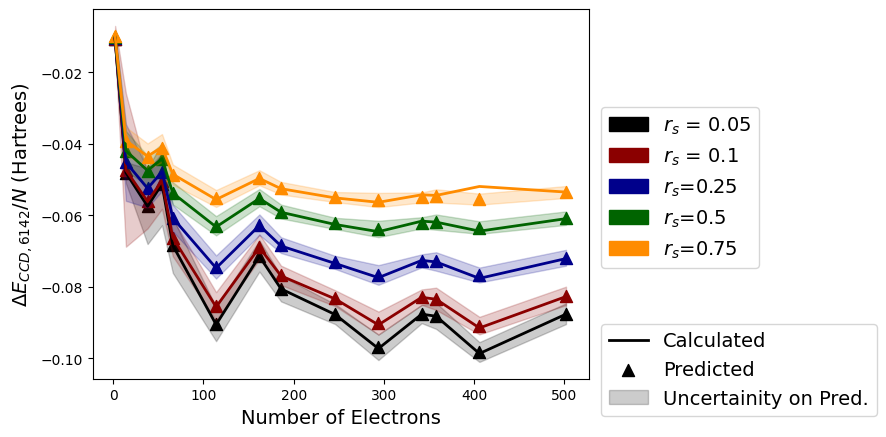

CPU times: user 1 s, sys: 26.5 ms, total: 1.03 s
Wall time: 604 ms


In [12]:
%%time
# Define the colors for the graphing and the data set labels
colors = ["black", "darkred", "darkblue", "darkgreen",  "darkorange"]
labels = [r"$r_s$ = 0.05",r"$r_s$ = 0.1",r"$r_s$=0.25",r"$r_s$=0.5",r"$r_s$=0.75"]
# Save the images here
savename = images_dir+"Figure2.pdf"
# Graph all of the true data and all of the predicted data with its uncertainities
numbers = np.asarray(numbers)
graph_model_outputs_with_uncertainities_many (numbers, true_collected, predictions_collected,\
                                                 std_collected, "Number of Electrons",\
                                                 r"$\Delta E_{CCD,6142}/N$ (Hartrees)", colors, labels,\
                                                 savename, isDisplay=True)

In [13]:
%%time
# Calculate the RMSE error and percent error per density
densities = [0.05, 0.1, 0.25, 0.5, 0.75]
for i in range(5):
    print("Density:", densities[i], "\t RMSE:", np.format_float_positional(rmse(predictions_collected[i],\
                true_collected[i]),precision=3, unique=False, fractional=False, trim='k'),\
                "\t Percent Error:", np.format_float_positional(percent_error(predictions_collected[i],\
                true_collected[i]),precision=3, unique=False, fractional=False, trim='k'))
    print()

Density: 0.05 	 RMSE: 0.000159 	 Percent Error: 0.116

Density: 0.1 	 RMSE: 0.000249 	 Percent Error: 0.193

Density: 0.25 	 RMSE: 0.000357 	 Percent Error: 0.329

Density: 0.5 	 RMSE: 0.000388 	 Percent Error: 0.437

Density: 0.75 	 RMSE: 0.000993 	 Percent Error: 0.880

CPU times: user 3.62 ms, sys: 81 µs, total: 3.7 ms
Wall time: 475 µs


In [14]:
%%time
# And calculate the total RMSE error and the total percent error across all densities
print("Average RMSE:", np.format_float_positional(rmse(predictions_collected, true_collected), \
                        precision=3, unique=False, fractional=False, trim='k'))
print("Average Percent Error:",np.format_float_positional(percent_error(predictions_collected,\
                        true_collected),precision=3, unique=False, fractional=False, trim='k'))


Average RMSE: 0.000520
Average Percent Error: 0.391
CPU times: user 4.8 ms, sys: 900 µs, total: 5.7 ms
Wall time: 930 µs


In [15]:
%%time
# Print the average standard deviation from the Bayesian ridge regression algorithm per denisty
for i in range(5):
    print("Density:", densities[i], "\t AVERAGE STD:", np.format_float_positional(np.average(std_collected[i]),\
            precision=3, unique=False, fractional=False, trim='k'))

Density: 0.05 	 AVERAGE STD: -0.00459
Density: 0.1 	 AVERAGE STD: -0.00510
Density: 0.25 	 AVERAGE STD: -0.00348
Density: 0.5 	 AVERAGE STD: -0.00263
Density: 0.75 	 AVERAGE STD: -0.00224
CPU times: user 1.8 ms, sys: 28 µs, total: 1.83 ms
Wall time: 340 µs


CPU times: user 69.8 ms, sys: 5.07 ms, total: 74.9 ms
Wall time: 25.6 ms


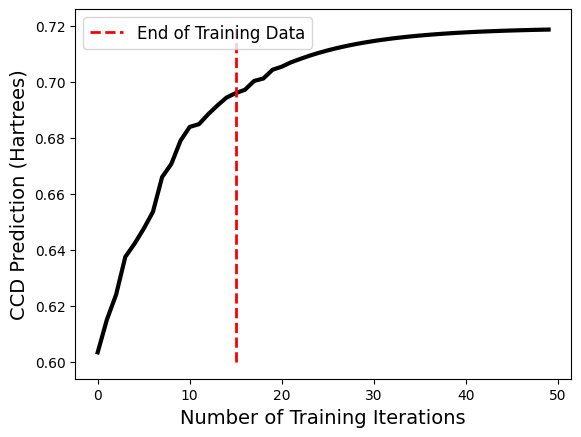

In [16]:
%%time
start_dim = 5
seq = 2
# Import and format the data 
states, mbpt, cc, mbpt_times, cc_times = import_and_split_columns(data_dir+"rs_0_5/N_358.csv", sep=sep)

# Seperate the final values (the test data), and the training data (taken from the first 
# 25 values)
final_cc = get_70(cc)
final_mbpt = get_70(mbpt)
cc_seq = get_seq(cc)
mbpt_seq=get_seq(mbpt)

# Separate the specified points for the training data
training_data = cc_seq[start_dim:dim]/mbpt_seq[start_dim:dim]
training_data = training_data.tolist()

# Format the training data in sequential series formatting
x_train, y_train = format_sequential_data (training_data, seq=seq)

# Set up Gaussian Process algorithm and train it
R = BayesianRidge(n_iter=10000,tol=1e-15)
R.fit(x_train, y_train)

# Feed the trained GP algorithm and data into the SRE method
ypred,ystd = sequential_extrapolate_sklearn(R, training_data, 50, seq=seq)

plt.plot(ypred, linewidth=3, color="black")
plt.xlabel("Number of Training Iterations", fontsize=14)
plt.ylabel("CCD Prediction (Hartrees)", fontsize=14)
plt.vlines(15, 0.60, 0.72, linewidth=2, linestyle="--", color="red", label="End of Training Data")
plt.legend(fontsize=12)